<a href="https://colab.research.google.com/github/Sushrut0202/CIIMS/blob/main/Classwise_Resistance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
resistance_counts.plot(kind="bar")

plt.title("Antibiotic-wise Resistance Frequency")
plt.xlabel("Antibiotic")
plt.ylabel("Number of Resistant Isolates")

# ✅ Increase y-axis scale (set slightly above max value)
plt.ylim(0, resistance_counts.max() + 5)

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving AMR data for class wise resistance viz.xlsx to AMR data for class wise resistance viz.xlsx


In [ ]:
import pandas as pd

file_name = list(uploaded.keys())[0]
df = pd.read_excel(file_name)

print("Shape:", df.shape)
df.head()


Shape: (400, 55)


,Sr. No,Sample Code,Name,Mobile number,Follow up (Yes/No),Age,Gender,Farm Name,Latitude,Longitude,...,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Selected for ANDC,WGS Results,mNGS results,Fecal Calprotectin ELISA
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Vanomycin,Tetracyclin,Nitrofurantoin,Rifampicin,Trimethoprim/Sulfamethoxazole,Cefoxitin Screen,NaN,NaN,NaN,NaN
1,1.0,CIIMS/AMR/001,Prakash,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,M,MAFSU,21.157542,79.048768,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
start_unnamed_col = 'Unnamed: 45'
end_unnamed_col = 'Unnamed: 50'

# Get the indices of the starting and ending 'Unnamed' columns
start_idx_unnamed = df.columns.get_loc(start_unnamed_col)
end_idx_unnamed = df.columns.get_loc(end_unnamed_col)

# Create a new DataFrame for antibiotic resistance data from the relevant 'Unnamed' columns
abx_data = df.iloc[:, start_idx_unnamed : end_idx_unnamed + 1]

# Set the first row of abx_data as column headers
abx_data.columns = abx_data.iloc[0]

# Drop the first row which was used as the header
abx_data = abx_data[1:].copy()

# Now `abx_data` has columns like 'Vanomycin', 'Tetracyclin', etc.
# Assuming 'Vanomycin' was the intended starting column (replacing 'RESISTANT')
# and 'Cefoxitin Screen' is the intended end column.
start_col_name = "Vanomycin"
end_col_name   = "Cefoxitin Screen"

start_col_idx = abx_data.columns.get_loc(start_col_name)
end_col_idx   = abx_data.columns.get_loc(end_col_name)

# Slice the `abx_data` DataFrame to get the specific range, including the end_col_name
abx = abx_data.iloc[:, start_col_idx : end_col_idx + 1]

abx.columns

Index(['Vanomycin', 'Tetracyclin', 'Nitrofurantoin', 'Rifampicin',
       'Trimethoprim/Sulfamethoxazole', 'Cefoxitin Screen'],
      dtype='object', name=0)

In [ ]:
abx_clean = abx.astype(str).apply(lambda x: x.str.strip().str.upper())

resistance_counts = (abx_clean == "R").sum().sort_values(ascending=False)
resistance_counts


,0
0,
Tetracyclin,2
Trimethoprim/Sulfamethoxazole,2
Vanomycin,0
Nitrofurantoin,0
Rifampicin,0
Cefoxitin Screen,0


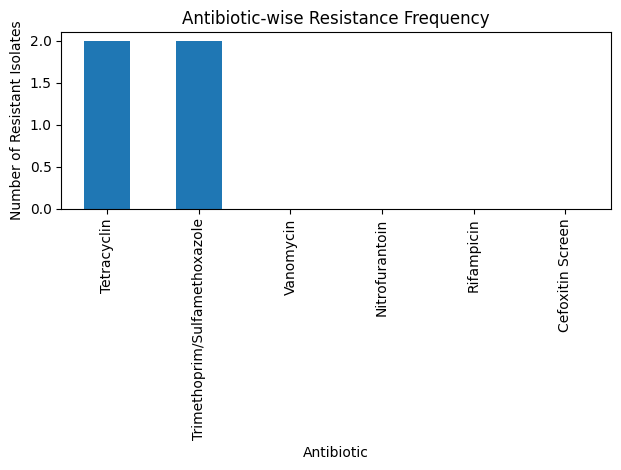

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
resistance_counts.plot(kind="bar")
plt.title("Antibiotic-wise Resistance Frequency")
plt.xlabel("Antibiotic")
plt.ylabel("Number of Resistant Isolates")
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("antibiotic_resistance.png", dpi=300)
plt.show()


In [ ]:
import pandas as pd

# List of antibiotic column names exactly as they appear in your sheet
antibiotic_cols = [
    "Amoxycillin/Clavulanic acid",
    "Piperacillin/Tazobactum",
    "Cefuroxime",
    "Cefuroxime Axetil",
    "Ceftriaxone",
    "Cefoperazone/Sulbactum",
    "Cefepime",
    "Entrapenum",
    "Imipenum",
    "Metropenem",
    "Amikacin",
    "Gentamicin",
    "Ciprofloxacin",
    "Tigecycline",
    "Fosfomycin",
    "Colistin",
    "Trimethoprim/Sulfmaethozole",   # note the typo from your header
    "Beta-lactamase",
    "Cefoxitin",
    "Benzylpenicillin",
    "Oxacillin",
    "Gentamicin High Level (synergy)",
    "Gentamycin",
    "Levofloxacin",
    "Induciable Clindamycin Resistance",
    "Erythromycin",
    "Clindamycin",
    "Linezolid",
    "Daptomycin",
    "Teicoplanin",
    "Vanomycin",
    "Tetracyclin",
    "Nitrofurantoin",
    "Rifampicin",
    "Trimethoprim/Sulfamethoxazole",  # if you have this column in some sheets
    "Cefoxitin Screen"
]

# Keep only the columns that actually exist in the file
antibiotic_cols = [c for c in antibiotic_cols if c in df.columns]

abx = df[antibiotic_cols]
print("Antibiotic columns used:")
print(abx.columns.tolist())


Antibiotic columns used:
[]


In [ ]:
import numpy as np

# Make everything string, strip spaces, uppercase
abx_clean = abx.astype(str).apply(lambda x: x.str.strip().str.upper())

# Quick check: what unique values do we have?
print("Unique values per column (first few):")
for col in abx_clean.columns[:10]:
    print(col, "->", abx_clean[col].unique()[:10])

# Count R per antibiotic
resistance_counts = (abx_clean == "R").sum().sort_values(ascending=False)
print(resistance_counts)


Unique values per column (first few):
Series([], dtype: float64)


IndexError: index 0 is out of bounds for axis 0 with size 0

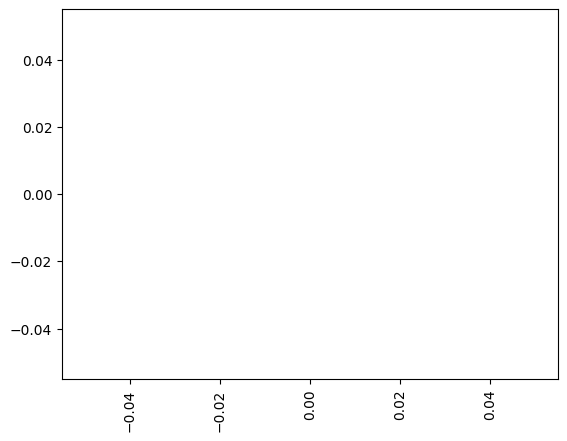

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
resistance_counts.plot(kind="bar")
plt.title("Antibiotic-wise Resistance Frequency")
plt.xlabel("Antibiotic")
plt.ylabel("Number of Resistant Isolates")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# df is already loaded from your Excel
cols = df.columns

start_idx = None   # first antibiotic column
end_idx = None     # last antibiotic column

for i, c in enumerate(cols):
    name = str(c)

    # first antibiotic: contains "Amoxycillin" (case-insensitive)
    if start_idx is None and "amoxycillin" in name.lower():
        start_idx = i

    # first column after antibiotics: contains "Selected for"
    if "selected for" in name.lower():
        end_idx = i - 1
        break

print("Start index:", start_idx, "->", cols[start_idx])
print("End index:", end_idx, "->", cols[end_idx])

abx = df.iloc[:, start_idx:end_idx+1]
print("Number of antibiotic columns:", abx.shape[1])
print(abx.columns.tolist())


ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

In [ ]:
import pandas as pd

# Force columns to be a simple 1-D Index of strings
cols = pd.Index([str(c) for c in df.columns])

print("Total columns:", len(cols))
for i, c in enumerate(cols):
    print(i, "->", repr(c))


Total columns: 55
0 -> 'Sr. No'
1 -> 'Sample Code'
2 -> 'Name'
3 -> 'Mobile number'
4 -> 'Follow up (Yes/No)'
5 -> 'Age'
6 -> 'Gender'
7 -> 'Farm Name'
8 -> 'Latitude'
9 -> 'Longitude'
10 -> 'Date of Sample Collection'
11 -> 'Name of Data Collector'
12 -> 'Processing centre'
13 -> 'Pathogen'
14 -> 'RESISTANT '
15 -> 'List of Antimicrograms'
16 -> 'Unnamed: 16'
17 -> 'Unnamed: 17'
18 -> 'Unnamed: 18'
19 -> 'Unnamed: 19'
20 -> 'Unnamed: 20'
21 -> 'Unnamed: 21'
22 -> 'Unnamed: 22'
23 -> 'Unnamed: 23'
24 -> 'Unnamed: 24'
25 -> 'Unnamed: 25'
26 -> 'Unnamed: 26'
27 -> 'Unnamed: 27'
28 -> 'Unnamed: 28'
29 -> 'Unnamed: 29'
30 -> 'Unnamed: 30'
31 -> 'Unnamed: 31'
32 -> 'Unnamed: 32'
33 -> 'Unnamed: 33'
34 -> 'Unnamed: 34'
35 -> 'Unnamed: 35'
36 -> 'Unnamed: 36'
37 -> 'Unnamed: 37'
38 -> 'Unnamed: 38'
39 -> 'Unnamed: 39'
40 -> 'Unnamed: 40'
41 -> 'Unnamed: 41'
42 -> 'Unnamed: 42'
43 -> 'Unnamed: 43'
44 -> 'Unnamed: 44'
45 -> 'Unnamed: 45'
46 -> 'Unnamed: 46'
47 -> 'Unnamed: 47'
48 -> 'Unnamed: 4

In [ ]:
import pandas as pd

# Load Excel
df = pd.read_excel(file_name)   # or re-run the upload + read_excel if needed

print("Columns before fix:")
print(list(df.columns))


Columns before fix:
['Sr. No', 'Sample Code', 'Name', 'Mobile number', 'Follow up (Yes/No)', 'Age', 'Gender', 'Farm Name', 'Latitude', 'Longitude', 'Date of Sample Collection', 'Name of Data Collector', 'Processing centre', 'Pathogen', 'RESISTANT ', 'List of Antimicrograms', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50', 'Selected for ANDC', 'WGS Results', 'mNGS results', 'Fecal Calprotectin ELISA']


In [ ]:
# Columns 15–50 (inclusive) are the antibiotic block
start_idx = 15
end_idx   = 50  # 51 is 'Selected for ANDC'

# Take antibiotic names from the first data row
abx_name_row = df.iloc[0, start_idx:end_idx+1]

# Build new column names
new_cols = list(df.columns)
new_cols[start_idx:end_idx+1] = abx_name_row.tolist()
df.columns = new_cols

# Drop the row that contained the antibiotic names
df = df.drop(index=0).reset_index(drop=True)

print("Columns after fix (antibiotics should now be named):")
print(list(df.columns[15:51]))


Columns after fix (antibiotics should now be named):
['Amoxycillin/Clavulanic acid', 'Piperacillin/Tazobactum', 'Cefuroxime', 'Cefuroxime Axetil', 'Ceftriaxone', 'Cefoperazone/Sulbactum', 'Cefepime', 'Entrapenum', 'Imipenum', 'Metropenem', 'Amikacin', 'Gentamicin', 'Ciprofloxacin', 'Tigecycline', 'Fosfomycin', 'Colistin', 'Trimethoprim/Sulfmaethozole', 'Beta-lactamase', 'Cefoxitin', 'Benzylpenicillin', 'Oxacillin', 'Gentamicin High Level (synergy)', 'Gentamycin', 'Levofloxacin', 'Induciable Clindamycin Resistance', 'Erythromycin', 'Clindamycin', 'Linezolid', 'Daptomycin', 'Teicoplanin', 'Vanomycin', 'Tetracyclin', 'Nitrofurantoin', 'Rifampicin', 'Trimethoprim/Sulfamethoxazole', 'Cefoxitin Screen']


In [ ]:
# Select the antibiotic block again
abx = df.iloc[:, start_idx:end_idx+1]

# Clean values
abx_clean = abx.astype(str).apply(lambda x: x.str.strip().str.upper())

# Quick sanity check
for col in list(abx_clean.columns)[:5]:
    print(col, "->", abx_clean[col].value_counts().head())

# Count resistant isolates
resistance_counts = (abx_clean == "R").sum().sort_values(ascending=False)
print(resistance_counts)


Amoxycillin/Clavulanic acid -> Amoxycillin/Clavulanic acid
NAN    379
R       18
33       1
19       1
Name: count, dtype: int64
Piperacillin/Tazobactum -> Piperacillin/Tazobactum
NAN    397
52       1
0        1
Name: count, dtype: int64
Cefuroxime -> Cefuroxime
NAN    380
R       17
32       1
17       1
Name: count, dtype: int64
Cefuroxime Axetil -> Cefuroxime Axetil
NAN    381
R       16
32       1
17       1
Name: count, dtype: int64
Ceftriaxone -> Ceftriaxone
NAN    391
R        6
37       1
6        1
Name: count, dtype: int64
Benzylpenicillin                     19
Amoxycillin/Clavulanic acid          18
Cefuroxime                           17
Cefuroxime Axetil                    16
Erythromycin                         10
Ciprofloxacin                        10
Clindamycin                           8
Ceftriaxone                           6
Levofloxacin                          4
Tetracyclin                           2
Gentamicin High Level (synergy)       2
Gentamycin          

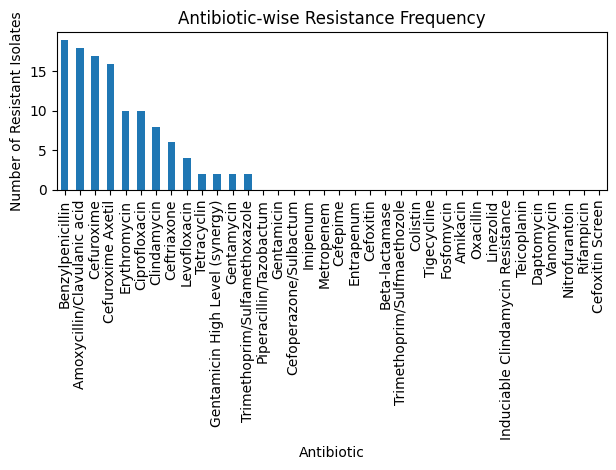

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
resistance_counts.plot(kind="bar")
plt.title("Antibiotic-wise Resistance Frequency")
plt.xlabel("Antibiotic")
plt.ylabel("Number of Resistant Isolates")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


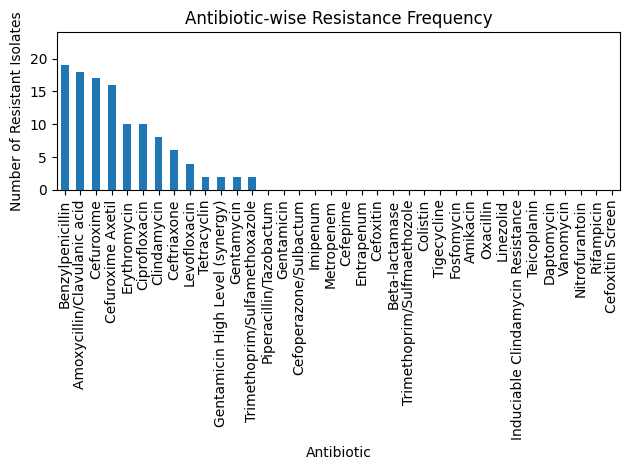

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
resistance_counts.plot(kind="bar")

plt.title("Antibiotic-wise Resistance Frequency")
plt.xlabel("Antibiotic")
plt.ylabel("Number of Resistant Isolates")

# ✅ Increase y-axis scale (set slightly above max value)
plt.ylim(0, resistance_counts.max() + 5)

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


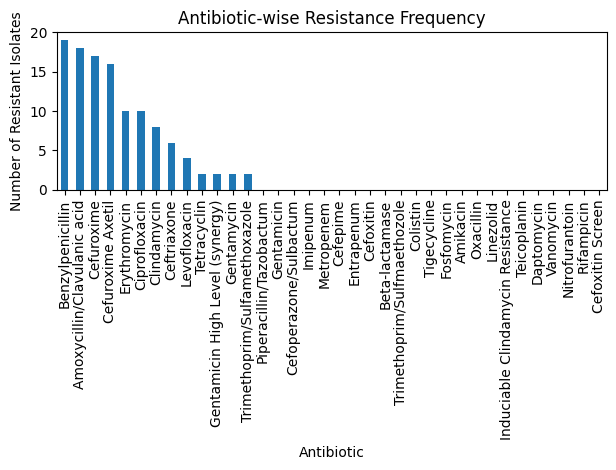

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
resistance_counts.plot(kind="bar")

plt.title("Antibiotic-wise Resistance Frequency")
plt.xlabel("Antibiotic")
plt.ylabel("Number of Resistant Isolates")

# ✅ Increase y-axis scale (set slightly above max value)
plt.ylim(0, resistance_counts.max() + 1)

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

plt.figure()
resistance_counts.plot(kind="bar")

plt.title("Antibiotic-wise Resistance Frequency")
plt.xlabel("Antibiotic")
plt.ylabel("Number of Resistant Isolates")

# ✅ Increase y-axis scale (set slightly above max value)
plt.ylim(0, resistance_counts.max() + 5)

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


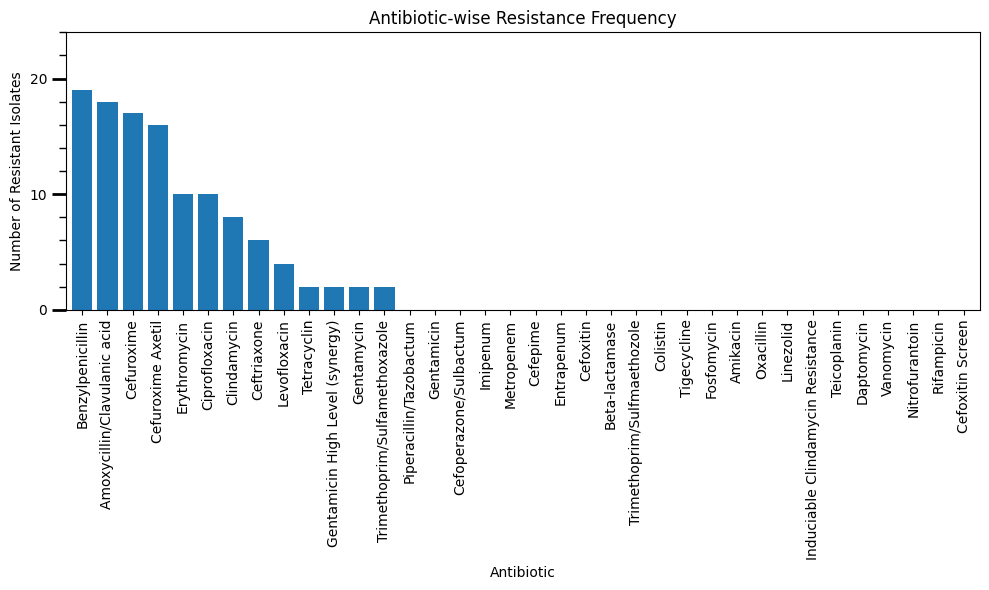

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker  # ✅ 1. Import ticker module

plt.figure(figsize=(10, 6)) # Added figsize for better visibility

# Plotting
ax = resistance_counts.plot(kind="bar", width=0.8) # ✅ 2. Capture the 'ax' (axes) object

plt.title("Antibiotic-wise Resistance Frequency")
plt.xlabel("Antibiotic")
plt.ylabel("Number of Resistant Isolates")

# ✅ 3. SET MAJOR TICKS (The distinct numbers on the axis)
# Change '10' to whatever gap you want between big numbers (e.g., 5, 10, 20)
ax.yaxis.set_major_locator(ticker.MultipleLocator(10))

# ✅ 4. SET MINOR TICKS (The small lines between big numbers)
# Change '2' to the gap you want for small lines (e.g., 1, 2, 2.5)
ax.yaxis.set_minor_locator(ticker.MultipleLocator(2))

# ✅ 5. OPTIONAL: Style the ticks so you can see the minor ones clearly
plt.tick_params(axis='y', which='major', length=10, width=2) # Big ticks style
plt.tick_params(axis='y', which='minor', length=5, width=1)  # Small ticks style

# Set limits
plt.ylim(0, resistance_counts.max() + 5)

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()